# PyTorch

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sklearn.datasets
import time
from IPython.display import display, clear_output

In [2]:
input_data, labels = sklearn.datasets.make_moons(200, noise = 0.15)

In [3]:
print(input_data)
print(labels)

[[ 5.95920849e-01 -4.17885502e-01]
 [-9.59275102e-02  7.94511342e-01]
 [ 2.25622303e-01  9.61336204e-01]
 [-1.03999483e+00  2.65475269e-01]
 [ 1.49761147e-01 -4.45017523e-01]
 [ 3.98547176e-01 -5.80579464e-02]
 [ 1.99824481e+00  9.80245895e-02]
 [-1.12666556e+00  1.69131900e-01]
 [-1.67386815e-01  3.14245826e-01]
 [ 2.14029357e-02  3.37637126e-02]
 [ 1.89326073e+00  2.11499875e-01]
 [ 1.80082956e+00 -3.14920124e-01]
 [ 7.82483387e-01  7.49473468e-01]
 [ 5.34349217e-01 -3.92873355e-01]
 [ 7.56784653e-01  1.09289236e+00]
 [-5.17874446e-03  9.89978676e-01]
 [ 1.16769239e+00 -5.38389262e-01]
 [ 9.17213917e-02  2.26132982e-01]
 [-3.44973907e-01  7.81235120e-01]
 [ 7.57023308e-01 -6.76649590e-01]
 [-8.71176913e-01  4.47206959e-01]
 [-4.97643897e-01  4.92982525e-01]
 [-6.54710194e-01  2.08623662e-01]
 [ 2.30195943e-02  2.33740078e-01]
 [-8.82694476e-01  7.35982921e-02]
 [ 5.52760489e-01 -2.55126373e-01]
 [ 4.68972390e-01 -5.51902263e-02]
 [ 1.95373986e+00  4.24794941e-01]
 [ 4.40788245e-01  8

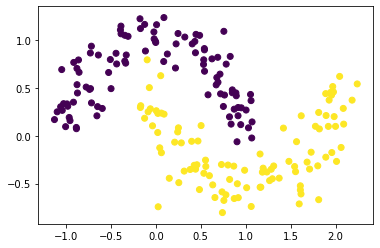

In [4]:
plt.scatter(input_data[:,0],input_data[:,1],c=labels)

In [5]:
input_data = torch.tensor(input_data).float()
labels = torch.tensor(labels).long()

In [6]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10,5)
        # not using this will give error so commented in forward
        self.fc3 = nn.Linear(5,2)
        self.act = nn.modules.activation.ReLU()
        
    def forward(self, input_data):
        out = self.fc1(input_data)
        out = self.act(out)
        out = self.fc2(out)
        out = self.act(out)  
        out = self.fc3(out)
        out = self.act(out)
        return out

In [7]:
model = Model()

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4911,  0.5586],
         [ 0.0814, -0.0402],
         [-0.3892,  0.5021],
         [-0.1687, -0.0873],
         [-0.0327, -0.3949],
         [ 0.2384, -0.6164],
         [ 0.2118, -0.4943],
         [ 0.2175,  0.2167],
         [ 0.1975, -0.2433],
         [-0.5557,  0.4221]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4205,  0.6221,  0.4362,  0.0687, -0.3471,  0.1872, -0.0784, -0.6832,
         -0.3738,  0.0287], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0088,  0.1443,  0.2232, -0.2061, -0.0982, -0.1352, -0.2820,  0.3017,
           0.0257, -0.1819],
         [ 0.1681, -0.2268, -0.0383, -0.1394, -0.2960, -0.2708,  0.0140, -0.3006,
          -0.0047,  0.1688],
         [-0.0715, -0.1351,  0.2210,  0.0076,  0.1243,  0.2072, -0.1451, -0.2098,
           0.2105,  0.1565],
         [-0.1756,  0.0508,  0.1871, -0.2735, -0.1604,  0.0717,  0.0125,  0.0221,
          -0.1563,  0.2953],
         [-0.3122,  0.1615,  0.0971,  0.2510,

In [9]:
loss_criteria = nn.CrossEntropyLoss()

In [10]:
initial_weights = model.parameters()
list(initial_weights)

[Parameter containing:
 tensor([[ 0.4911,  0.5586],
         [ 0.0814, -0.0402],
         [-0.3892,  0.5021],
         [-0.1687, -0.0873],
         [-0.0327, -0.3949],
         [ 0.2384, -0.6164],
         [ 0.2118, -0.4943],
         [ 0.2175,  0.2167],
         [ 0.1975, -0.2433],
         [-0.5557,  0.4221]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4205,  0.6221,  0.4362,  0.0687, -0.3471,  0.1872, -0.0784, -0.6832,
         -0.3738,  0.0287], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0088,  0.1443,  0.2232, -0.2061, -0.0982, -0.1352, -0.2820,  0.3017,
           0.0257, -0.1819],
         [ 0.1681, -0.2268, -0.0383, -0.1394, -0.2960, -0.2708,  0.0140, -0.3006,
          -0.0047,  0.1688],
         [-0.0715, -0.1351,  0.2210,  0.0076,  0.1243,  0.2072, -0.1451, -0.2098,
           0.2105,  0.1565],
         [-0.1756,  0.0508,  0.1871, -0.2735, -0.1604,  0.0717,  0.0125,  0.0221,
          -0.1563,  0.2953],
         [-0.3122,  0.1615,  0.0971,  0.2510,

In [43]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
for i in range(10):
    run_loss = 0
    for i in range(100):
        # This is forward call, outputs are predictions
        outputs = model(input_data)
#         print(outputs)
        loss = loss_criteria(outputs, labels)
        run_loss += loss.item()
        
        # set gradients to 0
        model.zero_grad()
#         optimizer.zero_grad()
        
        # recalculate gradients
        loss.backward()
#         optimizer.step()
        
        # Making sure any operation is not tracked in the block
        with torch.no_grad():
            for p in model.parameters():
                p.data = p - p.grad * 0.1
    clear_output(wait=True)
    print("Training Loss is {}".format(run_loss/100))
    time.sleep(2)
    
print("Done!")

Training Loss is 0.37762242794036865
Done!


In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1834,  0.3193],
         [ 0.6956, -0.6344],
         [-0.5632, -0.2930],
         [-0.4759, -0.2802],
         [-0.0785, -0.5536],
         [ 0.0150,  0.3985],
         [ 0.6609, -0.6289],
         [ 0.0082, -0.6005],
         [-0.3100,  0.5827],
         [-0.4970, -0.2681]], requires_grad=True),
 Parameter containing:
 tensor([-0.5354,  0.3613,  0.6409,  0.4232, -0.2692, -0.2636, -0.6011,  0.6553,
         -0.6191,  0.5201], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2635,  0.1455, -0.2566,  0.0129,  0.2335, -0.0033,  0.2304,  0.0283,
          -0.1295,  0.1123],
         [ 0.2165, -0.2483, -0.2928, -0.0235, -0.2625, -0.0775,  0.0413,  0.1955,
           0.2545, -0.2285],
         [-0.1899,  0.2474,  0.0886, -0.1377,  0.1811,  0.0793,  0.1286,  0.1859,
          -0.1120, -0.1660],
         [-0.2433,  0.2305, -0.1741, -0.1641, -0.2084, -0.2011, -0.0739,  0.3049,
           0.2405,  0.2212],
         [-0.0148,  0.0307, -0.0037, -0.0869,

In [33]:
_,p = torch.max(torch.tensor([10,15]),0)

In [60]:
with torch.no_grad():
    for p in model.parameters():
        print(p.grad)
        print(p)
        p-=p.grad*0.1
        break

tensor([[ 0.0000,  0.0000],
        [ 0.0083,  0.0363],
        [-0.0096, -0.0154],
        [ 0.0032, -0.0013],
        [-0.0003,  0.0002],
        [-0.0030, -0.0041],
        [-0.0115,  0.0047],
        [-0.0012,  0.0261],
        [ 0.0000,  0.0000],
        [-0.0004,  0.0065]])
Parameter containing:
tensor([[-0.1834,  0.3193],
        [ 0.7737, -0.7722],
        [-0.5586, -0.2010],
        [-0.4940, -0.2701],
        [-0.0765, -0.5552],
        [ 0.0258,  0.4202],
        [ 0.7564, -0.6498],
        [ 0.0820, -0.7203],
        [-0.3100,  0.5827],
        [-0.4684, -0.3089]], requires_grad=True)


In [61]:
    for p in model.parameters():
        print(p.grad)
        print(p)
        p.data-=p.grad*0.1
        print(p)
        break

tensor([[ 0.0000,  0.0000],
        [ 0.0083,  0.0363],
        [-0.0096, -0.0154],
        [ 0.0032, -0.0013],
        [-0.0003,  0.0002],
        [-0.0030, -0.0041],
        [-0.0115,  0.0047],
        [-0.0012,  0.0261],
        [ 0.0000,  0.0000],
        [-0.0004,  0.0065]])
Parameter containing:
tensor([[-0.1834,  0.3193],
        [ 0.7729, -0.7759],
        [-0.5576, -0.1994],
        [-0.4943, -0.2700],
        [-0.0765, -0.5552],
        [ 0.0261,  0.4206],
        [ 0.7576, -0.6502],
        [ 0.0822, -0.7229],
        [-0.3100,  0.5827],
        [-0.4684, -0.3096]], requires_grad=True)
Parameter containing:
tensor([[-0.1834,  0.3193],
        [ 0.7720, -0.7795],
        [-0.5567, -0.1979],
        [-0.4946, -0.2699],
        [-0.0765, -0.5553],
        [ 0.0264,  0.4210],
        [ 0.7587, -0.6507],
        [ 0.0823, -0.7255],
        [-0.3100,  0.5827],
        [-0.4684, -0.3102]], requires_grad=True)
